In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import codecs
import re
% matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ["Whitney Book","simhei"]

In [2]:
data = []
with codecs.open('data/chinese_only.json', 'rb',encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

In [7]:
data[0]['genres']

['动作', '科幻']

In [3]:
# 返回指定director/cast 相关的电影(片名[0],评分)tuples
def getRatings(name=None,person_type=None):
    '''
    Return all of specified person's {MovieName:Rating} dict.
    -----------------------------------------------------------
    Input:
    name: (str) director/cast name.
    person_type: (str) 'directors'/'casts'
    ___________________________________________________________
    Output:
    PersonRating: (dict) {MovieName1: Rating1, MovieName2: Rating2, ...}
    -----------------------------------------------------------
    Example:
    getRatings(name='黄渤',person_type='casts')
    '''
    PersonRating = {}
    for rec in data:
        if(rec['subtype']=='movie' and rec['ratings_count']>=10000 ):
            for iperson in rec[person_type]:
                if(iperson['name']==name):
                    PersonRating[rec['title']]=rec['rating']['average']
    return PersonRating

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


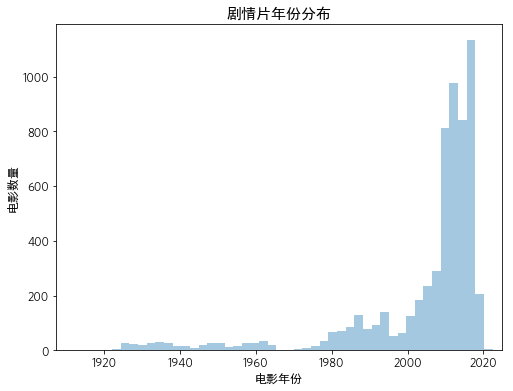

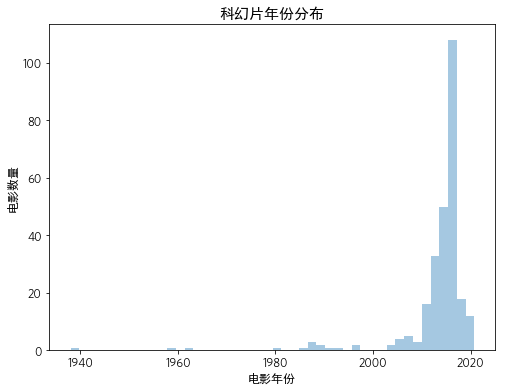

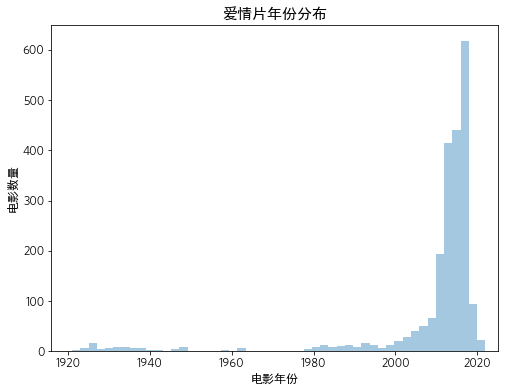

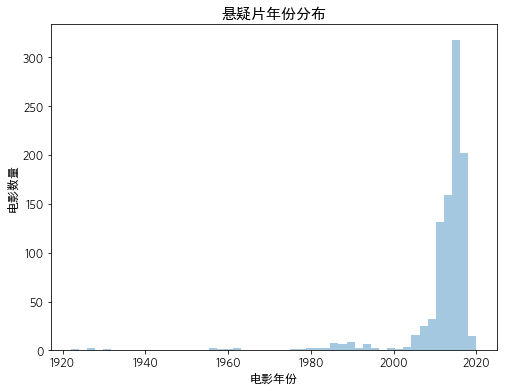

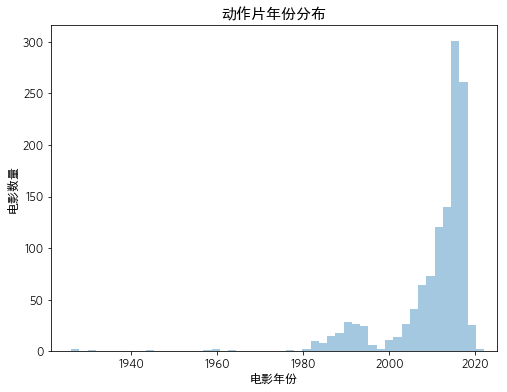

In [37]:
# Distribution of the year of movie
for mtype in ['剧情','科幻','爱情','悬疑','动作']:
    years = np.array([])
    for rec in data:
        if(rec['subtype']=='movie' and mtype in rec['genres']):
            iyear = re.sub(r'\D','',str(rec['year']))[:4] # regex: filter first 4 numbers only (for case '2000年';'2008-2010年')
            if(not iyear.strip()==''): # for case '不详'
                rec['year'] = int(iyear)
                years = np.append(years,int(iyear))
            else:
                rec['year'] = None

    plt.figure(figsize=(8,6))
    sns.distplot(years,kde=False)
    plt.xlabel('电影年份',fontname='simhei',fontsize=12)
    plt.ylabel('电影数量',fontname='simhei',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('{0}片年份分布'.format(mtype),fontname='simhei',fontsize=15)
    plt.xlim(xmax=2025)
    plt.show()

In [31]:
# Distribution of the year of movie
years = np.array([])
for rec in data:
    if(rec['subtype']=='movie'):
        iyear = re.sub(r'\D','',str(rec['year']))[:4] # regex: filter first 4 numbers only (for case '2000年';'2008-2010年')
        if(not iyear.strip()==''): # for case '不详'
            rec['year'] = int(iyear)
            years = np.append(years,int(iyear))
        else:
            rec['year'] = None

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


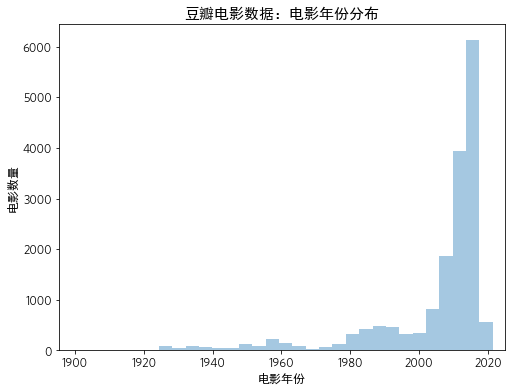

In [371]:
plt.figure(figsize=(8,6))
sns.distplot(years,kde=False)
plt.xlabel('电影年份',fontname='simhei',fontsize=12)
plt.ylabel('电影数量',fontname='simhei',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('豆瓣电影数据：电影年份分布',fontname='simhei',fontsize=15)
plt.xlim(xmax=2025)
plt.savefig('豆瓣电影数据：电影年份分布.png',dpi=600,transparent=True)

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


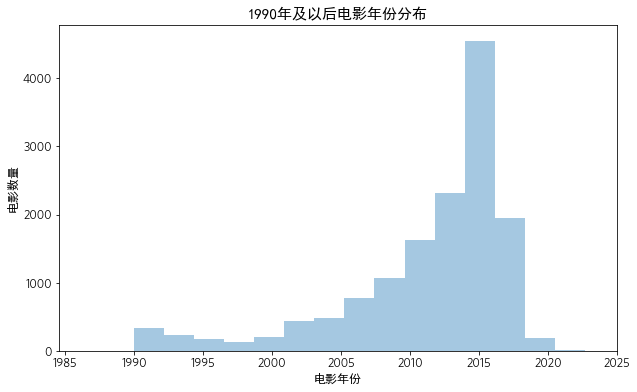

In [372]:
plt.figure(figsize=(10,6))
sns.distplot(years[years>=1990],kde=False) # only for movie no sooner than 1990
plt.xlabel('电影年份',fontname='simhei',fontsize=12)
plt.ylabel('电影数量',fontname='simhei',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('1990年及以后电影年份分布',fontname='simhei',fontsize=15)
plt.xlim(xmax=2025)
plt.savefig('1990年及以后电影年份分布.png',dpi=600,transparent=True)

In [102]:
# Distribution of movie ratings_count
ratecount = np.array([])
for rec in data:
    if(rec['subtype']=='movie'):
        ratecount = np.append(ratecount,rec['ratings_count'])

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


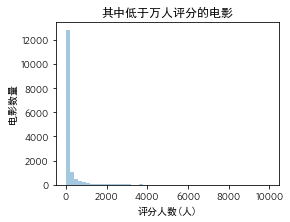

In [373]:
plt.figure(figsize=(4,3))
sns.distplot(ratecount[ratecount<10000],kde=False)
plt.xlabel('评分人数(人)',fontname='simhei',fontsize=10)
plt.ylabel('电影数量',fontname='simhei',fontsize=10)
plt.title('其中低于万人评分的电影',fontname='simhei',fontsize=12)
plt.savefig('低于万人评分人数分布.png',dpi=600,transparent=True)

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


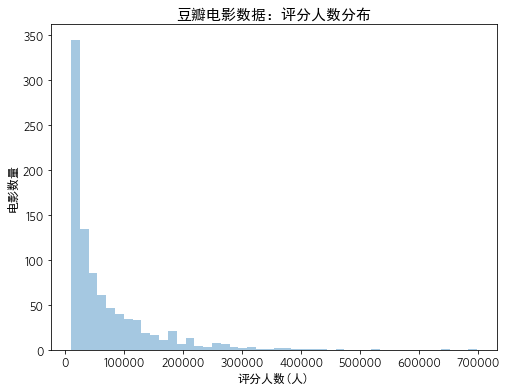

In [374]:
plt.figure(figsize=(8,6))
sns.distplot(ratecount[ratecount>10000],kde=False)

plt.xlabel('评分人数(人)',fontname='simhei',fontsize=12)
plt.ylabel('电影数量',fontname='simhei',fontsize=12)
plt.title('豆瓣电影数据：评分人数分布',fontname='simhei',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('豆瓣电影数据：评分人数分布.png',dpi=600,transparent=True)

In [142]:
# Distribution of movie ratings
rates = np.array([])
for rec in data:
    if(rec['subtype']=='movie'):# and rec['ratings_count']>=10000):
        rates = np.append(rates,rec['rating']['average'])

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


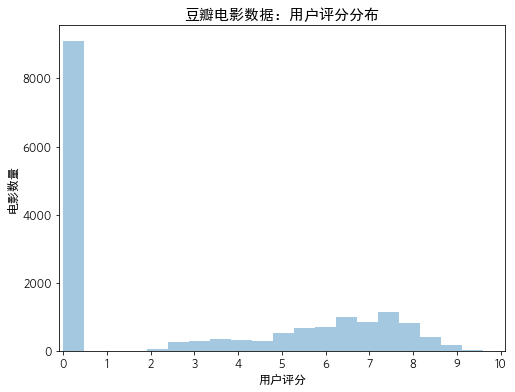

In [375]:
plt.figure(figsize=(8,6))
sns.distplot(rates,kde=False)

plt.xlabel('用户评分',fontname='simhei',fontsize=12)
plt.ylabel('电影数量',fontname='simhei',fontsize=12)
plt.title('豆瓣电影数据：用户评分分布',fontname='simhei',fontsize=15)
plt.xticks(np.arange(0,11,1),fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-0.1,10.1)
plt.savefig('豆瓣电影数据：用户评分分布.png',dpi=600,transparent=True)

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


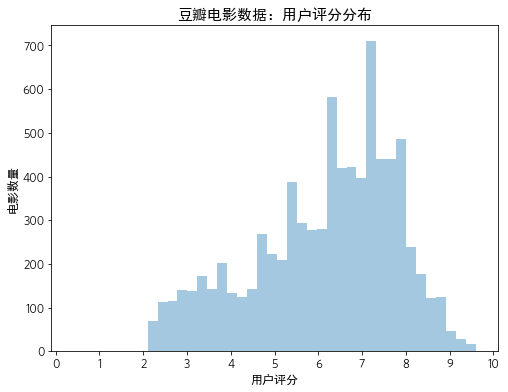

In [376]:
plt.figure(figsize=(8,6))
sns.distplot(rates[rates>0],kde=False)

plt.xlabel('用户评分',fontname='simhei',fontsize=12)
plt.ylabel('电影数量',fontname='simhei',fontsize=12)
plt.title('豆瓣电影数据：用户评分分布',fontname='simhei',fontsize=15)
plt.xticks(np.arange(0,11,1),fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-0.1,10.1)
plt.savefig('用户评分（大于0分）分布.png',dpi=600,transparent=True)

In [125]:
numcount = {}
totalrate = {}
for rec in data:
    if(rec['subtype']=='movie'):
        for mvtype in rec['genres']:
            if numcount.get(mvtype) is None:
                # Add a new type into dict
                numcount[mvtype] = 1
                totalrate[mvtype] = rec['rating']['average']
            else:
                # Count of this type ++ 
                numcount[mvtype] += 1
                totalrate[mvtype] += rec['rating']['average']

In [126]:
popcount = {}
totalpoprate = {}
for rec in data:
    if(rec['subtype']=='movie' and rec['ratings_count']>=10000):
        for mvtype in rec['genres']:
            if popcount.get(mvtype) is None:
                popcount[mvtype] = 1
                totalpoprate[mvtype] = rec['rating']['average']
            else:
                popcount[mvtype] += 1
                totalpoprate[mvtype] += rec['rating']['average']

In [73]:
df = pd.DataFrame.from_dict(numcount,orient='index')
df.columns = ['count']
tmp = pd.DataFrame.from_dict(totalrate,orient='index')
df.insert(1,'totalrate',tmp)
df.insert(2,'avgrate',df['totalrate']/df['count'])

In [84]:
NumTop10Type = df.sort_values('count',ascending=False)[:10]
RateTop10Type = df.sort_values('avgrate',ascending=False)[:10]

In [127]:
pop = pd.DataFrame.from_dict(popcount,orient='index')
pop.columns = ['count']
tmp = pd.DataFrame.from_dict(totalpoprate,orient='index')
pop.insert(1,'totalpoprate',tmp)
pop.insert(2,'avgpoprate',pop['totalpoprate']/pop['count'])

In [129]:
PopNumTop10Type = pop.sort_values('count',ascending=False)[:10]
PopRateTop10Type = pop.sort_values('avgpoprate',ascending=False)[:10]

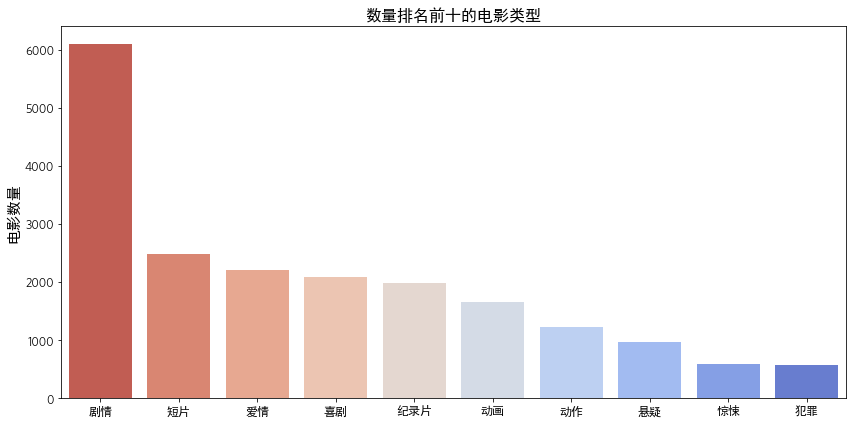

In [377]:
plt.figure(figsize=(12,6))
sns.barplot(x=NumTop10Type.index,y='count',data=NumTop10Type,palette='coolwarm_r')
plt.xticks(fontname='simhei',fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel('电影类型',fontname='simhei',fontsize=15)
plt.ylabel('电影数量',fontname='simhei',fontsize=15)
plt.title('数量排名前十的电影类型',fontname='simhei',fontsize=16)
plt.tight_layout()
plt.savefig('数量排名前十的电影类型.png',dpi=600,transparent=True)

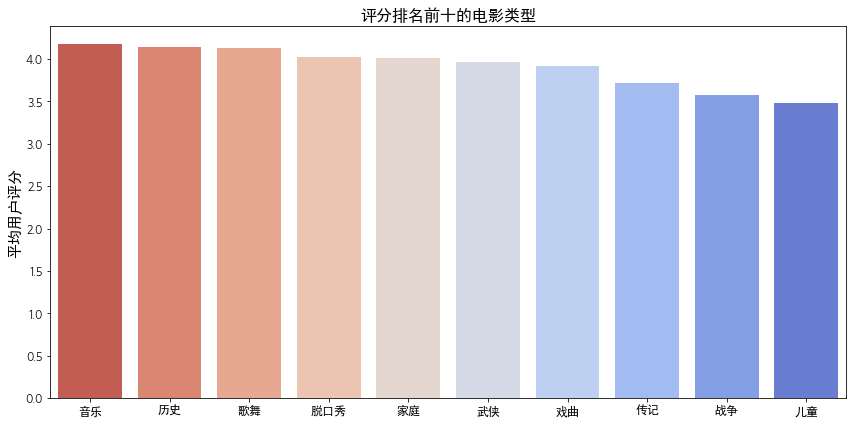

In [378]:
plt.figure(figsize=(12,6))
sns.barplot(x=RateTop10Type.index,y='avgrate',data=RateTop10Type,palette='coolwarm_r')
plt.xticks(fontname='simhei',fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel('电影类型',fontname='simhei',fontsize=15)
plt.ylabel('平均用户评分',fontname='simhei',fontsize=15)
plt.title('评分排名前十的电影类型',fontname='simhei',fontsize=16)
plt.tight_layout()
plt.savefig('全部电影中评分排名前十的电影类型.png',dpi=600,transparent=True)

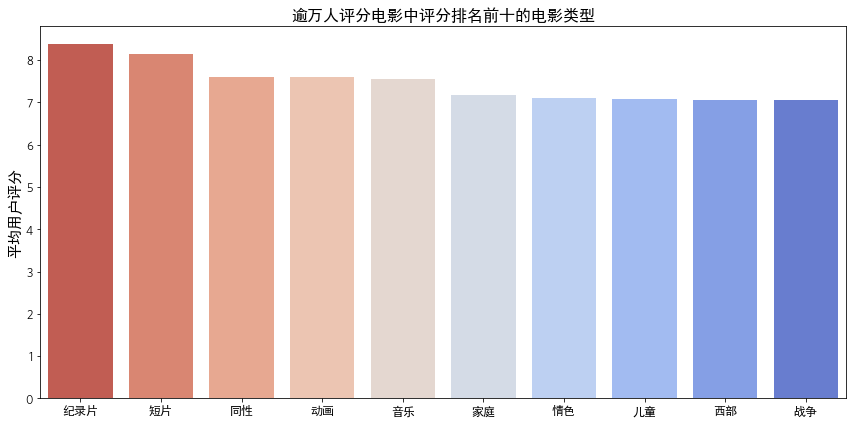

In [379]:
plt.figure(figsize=(12,6))
sns.barplot(x=PopRateTop10Type.index,y='avgpoprate',data=PopRateTop10Type,palette='coolwarm_r')
plt.xticks(fontname='simhei',fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel('电影类型',fontname='simhei',fontsize=15)
plt.ylabel('平均用户评分',fontname='simhei',fontsize=15)
plt.title('逾万人评分电影中评分排名前十的电影类型',fontname='simhei',fontsize=16)
plt.tight_layout()
plt.savefig('逾万人评分电影中评分排名前十的电影类型.png',dpi=600,transparent=True)

In [272]:
total_mv_haverate = len(rates[rates>0])
sorted_rates = sorted(rates[rates>0])
top20perc_rate = sorted_rates[int(0.8*total_mv_haverate)]
bot40perc_rate = sorted_rates[int(0.4*total_mv_haverate)]

In [311]:
def getPeriodRatings(startyr = None, endyr = None):
    '''
    Get the ratings of movies sorted by casts/directors
    FILTERED BY YEAR PERIOD
    ---------------------------------------------------
    INPUT:
    startyr: int, start year of filter period
    endyr: int, end year of filter period 
    (filtered year is in [startyr,endyr])
    ---------------------------------------------------
    OUTPUT: cast_rating_df; dir_rating_df
    cast_rating_df: pandas DataFrame
                    field: rating_mean;
                           rating_std;
                           great_count;
                           bad_count
    dir_rating_df: pandas DataFrame
                   field: rating_mean;
                          rating_std;
                          great_count;
                          bad_count
    '''
    cast_ratings = {}
    director_ratings = {}
    for rec in data:
        if(rec['subtype']=='movie' and rec['ratings_count']>=10000):
            if(rec['year'] in range(startyr,endyr+1)):
                for icast in rec['casts']:
                    if(cast_ratings.get(icast['name']) is None):
                        cast_ratings[icast['name']] = np.array([])
                    cast_ratings[icast['name']] = np.append(cast_ratings[icast['name']],rec['rating']['average'])
                for idir in rec['directors']:
                    if(director_ratings.get(idir['name']) is None):
                        director_ratings[idir['name']] = np.array([])
                    director_ratings[idir['name']] = np.append(director_ratings[idir['name']],rec['rating']['average'])


    # Find the variability of casts'/directors' performance (in rating of movies)
    cast_rating_mean = {}
    cast_rating_std = {}
    for icast in cast_ratings:
        cast_rating_mean[icast] = np.mean(cast_ratings[icast])
        cast_rating_std[icast] = np.std(cast_ratings[icast])

    dir_rating_mean = {}
    dir_rating_std = {}
    for idir in director_ratings:
        dir_rating_mean[idir] = np.mean(director_ratings[idir])
        dir_rating_std[idir] = np.std(director_ratings[idir])

    # stat of casts/directors involved in great/bad movies
    # definition of a great movie：rating above top 10% (top10perc_rate = 8.0)
    # definition of a bad movie：rating below bottom 40%  (bot40perc_rate = 6.0)
    cast_great_count = {}
    cast_bad_count = {}
    dir_great_count = {}
    dir_bad_count = {}
    for rec in data:
        if(rec['subtype']=='movie' and rec['ratings_count']>=10000 and (rec['year'] in range(startyr,endyr+1))):
            if(rec['rating']['average']>=top20perc_rate):
                for icast in rec['casts']:
                    if(cast_great_count.get(icast['name']) is None):
                        cast_great_count[icast['name']] = 1
                    else:
                        cast_great_count[icast['name']] += 1
                for idir in rec['directors']:
                    if(dir_great_count.get(idir['name']) is None):
                        dir_great_count[idir['name']] = 1
                    else:
                        dir_great_count[idir['name']] += 1
            if(rec['rating']['average']<=bot40perc_rate):
                for icast in rec['casts']:
                    if(cast_bad_count.get(icast['name']) is None):
                        cast_bad_count[icast['name']] = 1
                    else:
                        cast_bad_count[icast['name']] += 1
                for idir in rec['directors']:
                    if(dir_bad_count.get(idir['name']) is None):
                        dir_bad_count[idir['name']] = 1
                    else:
                        dir_bad_count[idir['name']] += 1

    cast_rating_df = pd.DataFrame.from_dict(cast_rating_mean,orient='index')
    cast_rating_df.columns=['rating_mean']
    tmp = pd.DataFrame.from_dict(cast_rating_std,orient='index')
    cast_rating_df.insert(1,'rating_std',tmp)
    tmp = pd.DataFrame.from_dict(cast_great_count,orient='index')
    cast_rating_df.insert(2,'great_count',tmp)
    tmp = pd.DataFrame.from_dict(cast_bad_count,orient='index')
    cast_rating_df.insert(3,'bad_count',tmp)
    no_bad = cast_rating_df['bad_count'].isnull()
    cast_rating_df.loc[no_bad,'bad_count']=0
    no_great = cast_rating_df['great_count'].isnull()
    cast_rating_df.loc[no_great,'great_count']=0
    cast_compound = (cast_rating_df.rating_mean*cast_rating_df.great_count
                    - cast_rating_df.rating_std*cast_rating_df.bad_count/(cast_rating_df.great_count+cast_rating_df.bad_count))
    cast_rating_df.insert(4,'compound',cast_compound)
    
    dir_rating_df = pd.DataFrame.from_dict(dir_rating_mean,orient='index')
    dir_rating_df.columns=['rating_mean']
    tmp = pd.DataFrame.from_dict(dir_rating_std,orient='index')
    dir_rating_df.insert(1,'rating_std',tmp)
    tmp = pd.DataFrame.from_dict(dir_great_count,orient='index')
    dir_rating_df.insert(2,'great_count',tmp)
    tmp = pd.DataFrame.from_dict(dir_bad_count,orient='index')
    dir_rating_df.insert(3,'bad_count',tmp)
    no_bad = dir_rating_df['bad_count'].isnull()
    dir_rating_df.loc[no_bad,'bad_count']=0
    no_great = dir_rating_df['great_count'].isnull()
    dir_rating_df.loc[no_great,'great_count']=0
    dir_compound = (dir_rating_df.rating_mean*dir_rating_df.great_count
                   - dir_rating_df.rating_std*dir_rating_df.bad_count/(dir_rating_df.great_count+dir_rating_df.bad_count))
    dir_rating_df.insert(4,'compound',dir_compound)
    
    return cast_rating_df, dir_rating_df

In [322]:
cast_rating_df_90_00, dir_rating_df_90_00 = getPeriodRatings(startyr=1990,endyr=2000)
cast_rating_df_01_10, dir_rating_df_01_10 = getPeriodRatings(startyr=2001,endyr=2010)
cast_rating_df_11_18, dir_rating_df_11_18 = getPeriodRatings(startyr=2011,endyr=2018)

cast_top_rating_90_00 = cast_rating_df_90_00.sort_values(['compound','rating_mean'],ascending=False)
cast_top_rating_01_10 = cast_rating_df_01_10.sort_values(['compound','rating_mean'],ascending=False)
cast_top_rating_11_18 = cast_rating_df_11_18.sort_values(['compound','rating_mean'],ascending=False)
dir_top_rating_90_00 = dir_rating_df_90_00.sort_values(['compound','rating_mean'],ascending=False)
dir_top_rating_01_10 = dir_rating_df_01_10.sort_values(['compound','rating_mean'],ascending=False)
dir_top_rating_11_18 = dir_rating_df_11_18.sort_values(['compound','rating_mean'],ascending=False)

In [369]:
# Draw Top 10 casts/directors
def DrawTop10(title=None,data=None):
    plt.figure(figsize=(6,8))
    sns.barplot(y=data.index[:10],x='compound',palette='summer',data=data[:10],orient='h')
    plt.yticks(fontname='simhei',fontsize=15)
    plt.xlabel('综合得分',fontname='simhei',fontsize='15')
    plt.xticks(fontsize=15)
    plt.savefig(title+'.png',dpi=600,transparent=True)
    plt.close()

In [370]:
DrawTop10(title='90年代Top10演员',data=cast_top_rating_90_00)
DrawTop10(title='00年代Top10演员',data=cast_top_rating_01_10)
DrawTop10(title='10年代Top10演员',data=cast_top_rating_11_18)
DrawTop10(title='90年代Top10导演',data=dir_top_rating_90_00)
DrawTop10(title='00年代Top10导演',data=dir_top_rating_01_10)
DrawTop10(title='10年代Top10导演',data=dir_top_rating_11_18)

In [365]:
from wordcloud import WordCloud
def GenerateWordCloud(title=None,data=None,key=None,N_person=20):
    text=''
    for idf in data.index[:N_person]:
        text += int(np.ceil(data.loc[idf,key]))*(idf+' ')
        font = r'C:\Windows\Fonts\simhei.ttf'
    wc = WordCloud(collocations=False, colormap= 'summer', min_font_size=8, background_color = 'white',font_path=font, width=3500, height=2000, margin=50).generate(text.lower())
    plt.axis("off")
    wc.to_file(title+'.png')

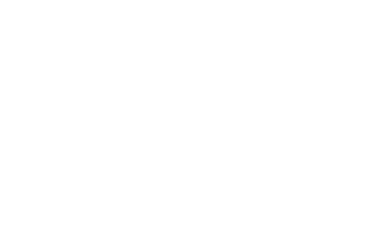

In [366]:
GenerateWordCloud(title='90年代Top20演员',data=cast_top_rating_90_00,key='compound',N_person=20)
GenerateWordCloud(title='00年代Top20演员',data=cast_top_rating_01_10,key='compound',N_person=20)
GenerateWordCloud(title='10年代Top20演员',data=cast_top_rating_11_18,key='compound',N_person=20)
GenerateWordCloud(title='90年代Top20导演',data=dir_top_rating_90_00,key='compound',N_person=20)
GenerateWordCloud(title='00年代Top20导演',data=dir_top_rating_01_10,key='compound',N_person=20)
GenerateWordCloud(title='10年代Top20导演',data=dir_top_rating_11_18,key='compound',N_person=20)